<img
src="http://www.telecom-em.eu/sites/default/files/logoimt2016.JPG"
WIDTH=180 HEIGHT=180>

<CENTER>
</br>
<p><font size="5">  TAF MCE - Machine Learning  </font></p>
<p><font size="5">  Decision trees </font></p>
<p><font size="3"></br>Fall 2021</font></br></div>
<p><span style="color:blue">pierre.tandeo@imt-atlantique.fr</span>
</p>
</CENTER>

----------------------------

The goal of this lab is to implement and visualize decision trees. Both aspects of classification and regression will be studied using simple examples. Cross-validation procedures will be used to tune the important parameters of the trees. Monte Carlo methods, using an ensemble of decision trees, are also discussed.

In [1]:
#Install graphviz library (needed to plot a tree)
!pip install graphviz
#!pip install python-graphviz

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import classic libraries (Matplotlib and PyLab)
%matplotlib inline
%pylab inline

# Import scikit-learn functions
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import log_loss

# Import pandas
import pandas as pd

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

# Figure size
pylab.rcParams['figure.figsize'] = (16, 9)

Populating the interactive namespace from numpy and matplotlib


## I - Course example on regression trees

The decision tree is presented in the course using a simple regression problem. This is corresponding to a simple regression between $y$ and $x$, using a $\sin$ function.

> 1. Generate x and y (adding an additive random noise of mean=0 and std=0.25 on y)
> 2. Apply a single regression tree with depth=1,10
> 3. Optimize the depth of the tree using cross-validation
> 4. Compute and plot the tree with the optimal depth
> 5. Implement a regression forest with the optimal depth

Text(0, 0.5, 'y')

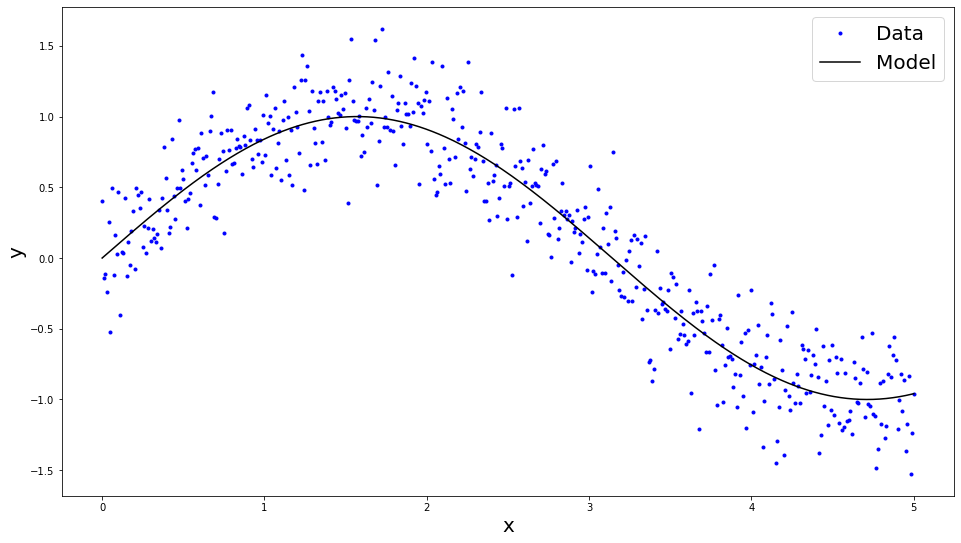

In [26]:
# 1. Generate x and y (adding an additive random noise of mean=0 and std=0.25 on y)

# Data generation
random.seed(1) # setting seed for reproducability
n = 500 # number of samples
x = array([linspace(0, 5, n)]).T
y = []
for i in range(n):
    y.append(sin(x[i]) + np.random.normal(0,0.25))
    
y = np.array(y)

# Plot
line1, = plot(x, y, '.b')
line2, = plot(x, sin(x), '-k')
legend([line1, line2], ['Data', 'Model'], prop={'size': 20})
xlabel('x', size=20)
ylabel('y', size=20)

Text(0, 0.5, 'y')

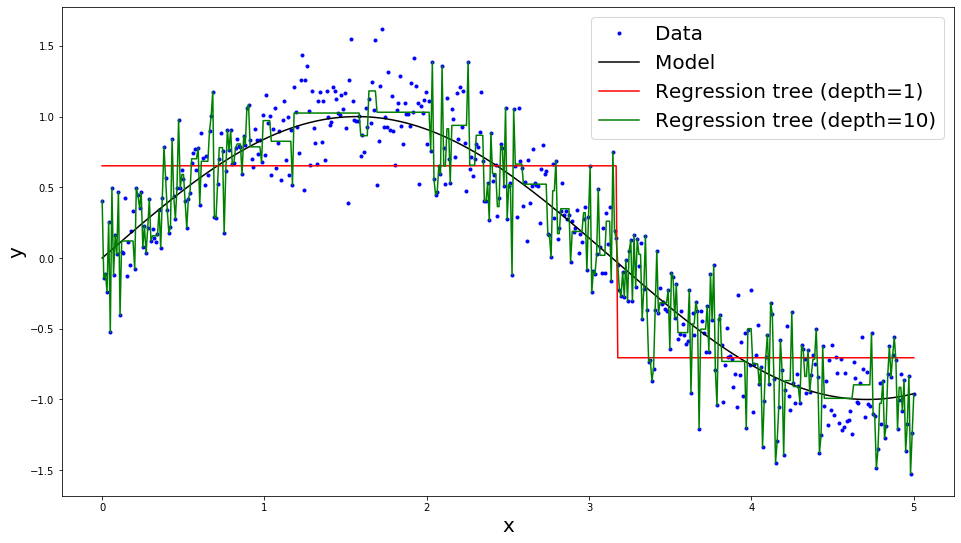

In [27]:
# 2. Apply a single regression tree with depth=1,10

# Build the tree (with depth=1)
reg_tree_example_1 = DecisionTreeRegressor(max_depth=1)
reg_tree_example_1.fit(x, y)
y_tree_example_1 = reg_tree_example_1.predict(x)

# Build the trees (with depth=10)
reg_tree_example_10 = DecisionTreeRegressor(max_depth=10)
reg_tree_example_10.fit(x, y)
y_tree_example_10 = reg_tree_example_10.predict(x)

# Plot
line1, = plot(x, y, '.b')
line2, = plot(x, sin(x), '-k')
line3, = plot(x, y_tree_example_1, '-r')
line4, = plot(x, y_tree_example_10, '-g')
legend([line1, line2, line3, line4], ['Data', 'Model', 'Regression tree (depth=1)', 'Regression tree (depth=10)'], prop={'size': 20})
xlabel('x', size=20)
ylabel('y', size=20)

Text(0, 0.5, 'RMSE')

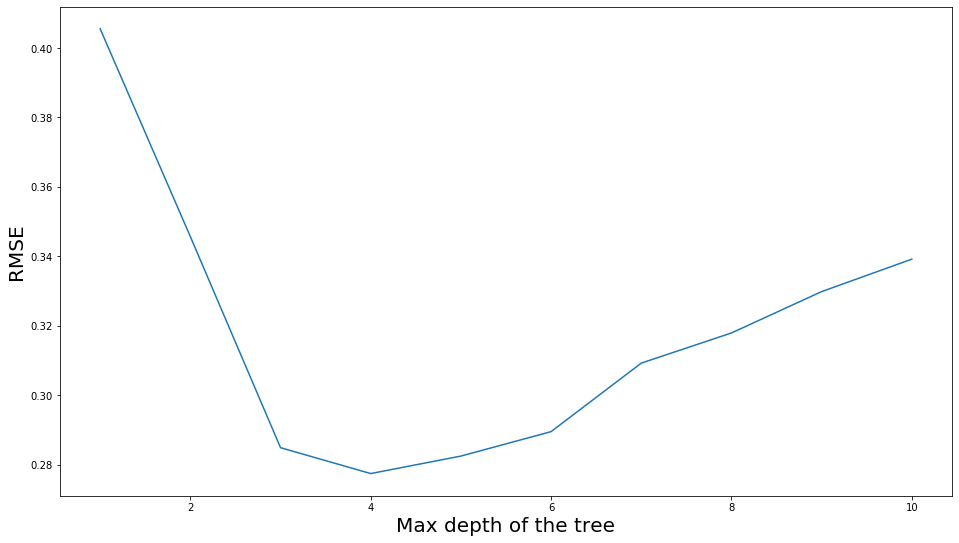

In [28]:
# 3. Optimize the depth of the tree using cross-validation

# Define the cvp (cross-validation procedure) with random 1000 samples, 2/3 training size, and 1/3 test size
cvp = ShuffleSplit(n_splits = 10, test_size = 1/3, train_size = 2/3, random_state= 1000)

# Define the max depths between 1 and 10
n_depths = 10
depths = linspace(1, 10, n_depths)

# Loop on the max_depth parameter and compute median RMSE
tab_RMSE_tree = zeros(n_depths)
for i in range(n_depths):
    reg_tree = DecisionTreeRegressor(max_depth=depths[i])
    tab_RMSE_tree[i] = median(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)))

# Plot
plot(depths, tab_RMSE_tree)
xlabel('Max depth of the tree', size=20)
ylabel('RMSE', size=20)

In [29]:
best_max_depth = tab_RMSE_tree.argmin()+1
best_max_depth

4

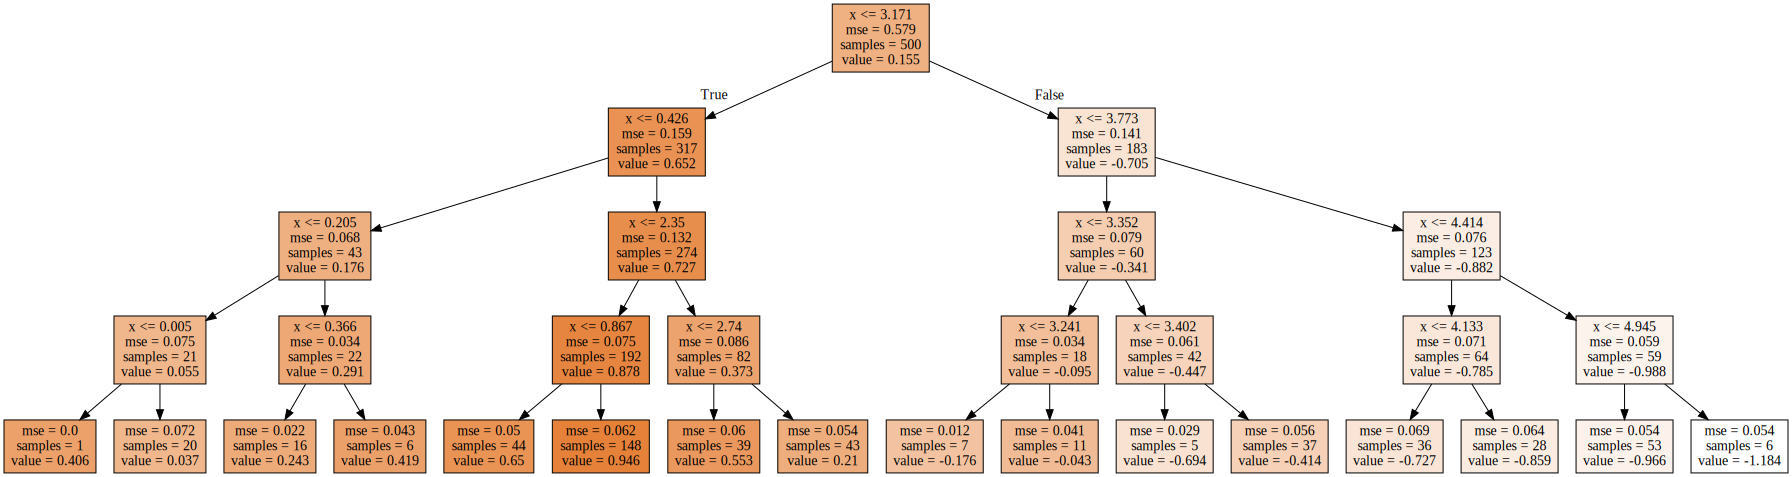

In [30]:
# 4. Compute and plot the tree with the optimal depth

# Adjust regression tree with optimal depth
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(x, y)
y_tree = reg_tree.predict(x)

# Export the tree to "plot_tree.pdf"
plot_tree = export_graphviz(reg_tree, out_file=None, feature_names=['x'], filled=True) 
graph = Source(plot_tree) 
graph.render("reg_tree")

# Plot the tree
graph

Text(0, 0.5, 'y')

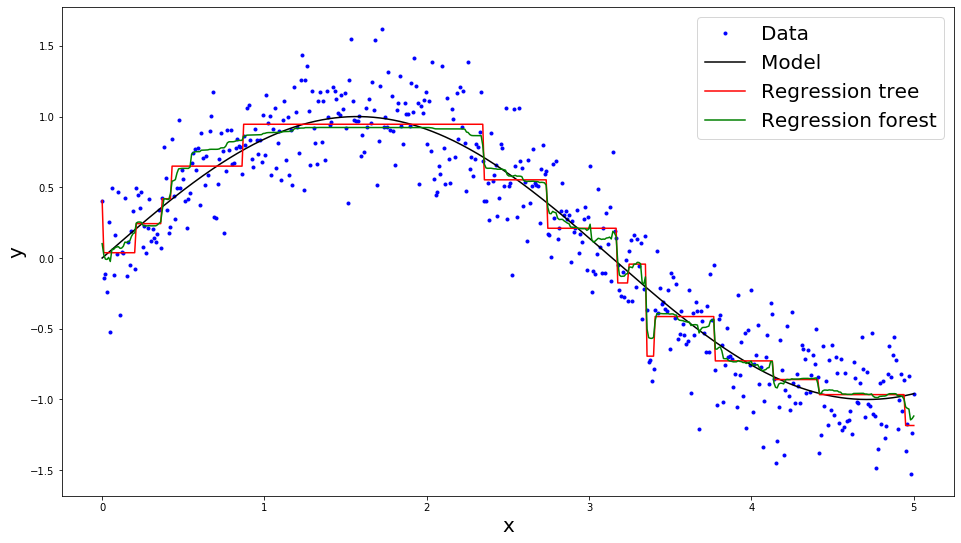

In [31]:
# 5. Implement a regression forest with the optimal depth

# Adjust regression forest using 1000 trees
reg_forest = RandomForestRegressor(n_estimators=1000, max_depth=4)
reg_forest.fit(x, y)
y_forest = reg_forest.predict(x)

# Plot
line1, = plot(x, y, '.b')
line2, = plot(x, sin(x), '-k')
line3, = plot(x, y_tree, '-r')
line4, = plot(x, y_forest, '-g')
legend([line1, line2, line3, line4], ['Data', 'Model', 'Regression tree', 'Regression forest'], prop={'size': 20})
xlabel('x', size=20)
ylabel('y', size=20)

## II - Single tree for binary classification

Here, we use a binary classification on the Titanic historical dataset. The goal is to understand the rules infered by the classification tree to predict the output variable (i.e., did people died or survived).

> 1. Import X and y
> 2. Use a cross-validation procedure to tune the depth of the classification tree
> 3. Plot the best classification tree
> 4. Explain the rules obtained to get the classification

In [12]:
# 1. Import X and y

# Import dataset
data_titanic = pd.read_csv('titanic.csv')

# Read X and y
X = data_titanic.drop(['Survived'], axis=1).values
y = data_titanic['Survived'].values
y = (y>0.5) # transform to binary data

print(data_titanic.drop(['Survived'], axis=1))

     Pclass  Sex  Age  FamilySize  Title
0         3    1    1           2      1
1         1    0    2           2      3
2         3    0    1           1      4
3         1    0    2           2      3
4         3    1    2           1      1
..      ...  ...  ...         ...    ...
886       2    1    1           1      5
887       1    0    1           1      4
888       3    0    1           4      4
889       1    1    1           1      1
890       3    1    1           1      1

[891 rows x 5 columns]


Here are some details about the dataset:
- Survived (False --> no, True --> yes)
- Pclass (1 --> 1st class, 2 --> 2nd class, 3 --> 3rd class)
- Sex (0 --> female, 1 --> male)
- Age (0 --> less than 16, 1 --> between 16 and 32, 2 --> between 32 and 48, 3 --> between 48 and 64, 4 --> more than 64)
- FamilySize (number of members in the family)
- Title (1 --> Mr, 2 --> Master, 3 --> Mrs, 4 --> Miss, 5 --> rare)

Text(0, 0.5, 'Log Loss')

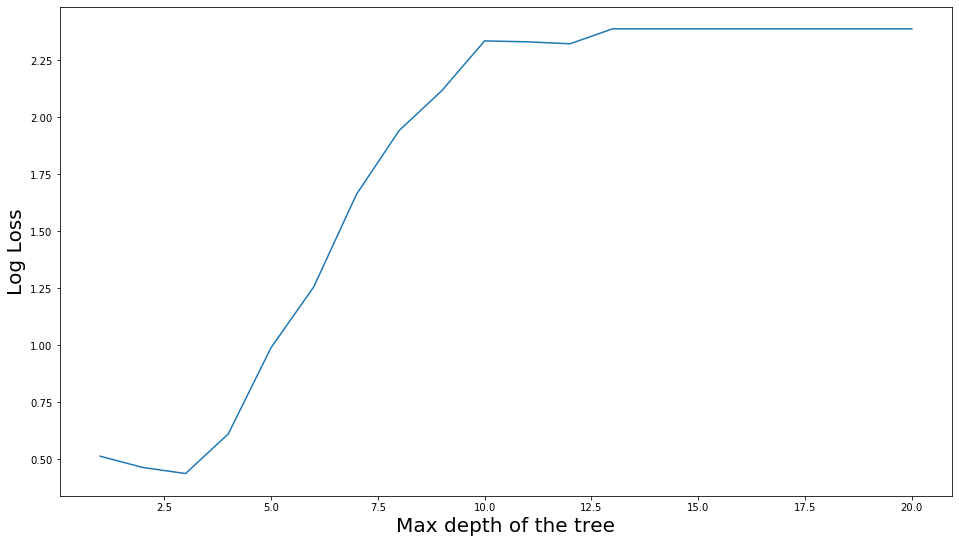

In [13]:
# 2. Use a cross-validation procedure to tune the depth of the classification tree

# Define the cvp (cross-validation procedure) with random 1000 samples, 2/3 training size, and 1/3 test size
cvp = ShuffleSplit(n_splits = 10, test_size = 1/3, train_size = 2/3, random_state=1000)

# Define the max depths between 1 and 10
n_depths = 20
depths = linspace(1, 20, n_depths)

# Loop on the max_depth parameter and compute Log_Loss
tab_LogLoss_tree = zeros(n_depths)
for i in range(n_depths):
    classifier_tree = DecisionTreeClassifier(max_depth=depths[i], random_state=1)
    tab_LogLoss_tree[i] = median(-cross_val_score(classifier_tree, X, y, scoring='neg_log_loss', cv=cvp))

# Plot
plot(depths, tab_LogLoss_tree)
xlabel('Max depth of the tree', size=20)
ylabel('Log Loss', size=20)

In [14]:
best_max_depth = tab_LogLoss_tree.argmin()+1
best_max_depth

3

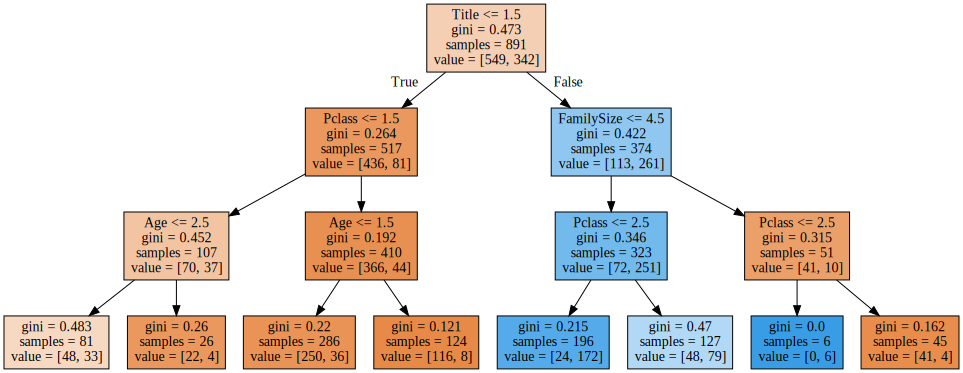

In [15]:
# 3. Plot the best classification tree

# Adjust regression tree with optimal depth
classifier_tree = DecisionTreeClassifier(max_depth=best_max_depth, random_state = 1)
classifier_tree.fit(X, y)
y_tree = classifier_tree.predict(X)

# Export the tree to "plot_tree.pdf"
plot_tree = export_graphviz(classifier_tree, out_file=None, feature_names=['Pclass','Sex','Age','FamilySize','Title'], filled=True) 
graph = Source(plot_tree) 
graph.render("classifier_tree")

# Plot the tree
graph

In [16]:
# 4. Explain the rules obtained to get the classification

We first look at the title of the passenger:
    if the title <= 1.5 is true:
        we can direclty conclude that the passenger has died,
    else we look to the family size:
        if FamilySize <= 4.5 is true:
            we can directly conclude that the passenger has survived 
        else we look to the Pclass:
            if the PClass <= 2.5 is true:
                we can conclude that the passenger has survived,
            else we can conclude that the passenger has died.

SyntaxError: invalid syntax (<ipython-input-16-5d01599cd124>, line 3)

## III - Multiple trees for binary classification

We consider another binary classification problem. The goal is to visualize the results of decision trees in nonlinear problems.

> 1. Generate data (x1, x2, y)
> 2. Apply classification trees with depth=1,2,3,4
> 3. Implement and compare the classification forest with depth=3 and the ada boost classifier

Text(0.5, 1.0, 'Binary classification')

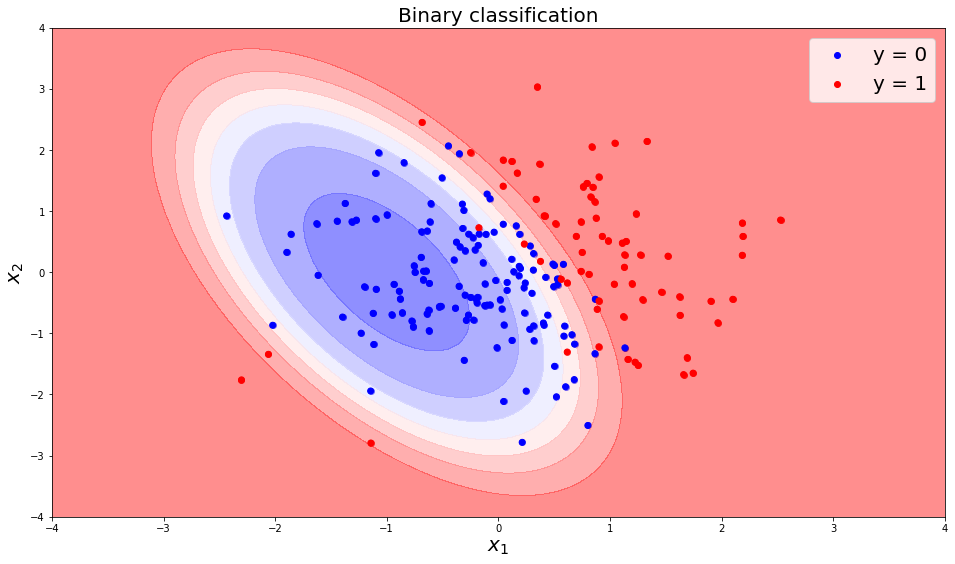

In [3]:
# 1. Generate the data

# Input variables
random.seed(1) # setting seed for reproducability
n = 200 # number of samples
x1 = randn(n, 1)
x2 = randn(n, 1)
x = hstack((x1, x2))

# True parameters
w0 = -0.5
w1 = 1.5
w2 = 0.5
w11 = 0.75
w22 = 0.25
w12 = 0.5

# Noise
epsilon = randn(n, 1)/3

# Output variable
y_noise = tanh(w0 + w1*x1 + w2*x2 + w11*x1**2 + w22*x2**2 + w12*x1*x2 + epsilon)
y = (y_noise>0.5) # transform to binary data

# For visualization
X1, X2 = meshgrid(linspace(-4, 4, 100), linspace(-4, 4, 100))
X = vstack((ravel(X1), ravel(X2))).T
Y = tanh(w0 + w1*X1 + w2*X2 + w11*X1**2 + w22*X2**2 + w12*X1*X2)

# Plot data
scatter(x1[y==0], x2[y==0], c='b')
scatter(x1[y==1], x2[y==1], c='r')
contourf(X1, X2, Y, cmap='bwr', alpha=0.5)
scatter(x1, x2, c=y, cmap='bwr')
legend(['y = 0', 'y = 1'], prop={'size': 20})
xlabel("$x_1$", fontsize=20)
ylabel("$x_2$", fontsize=20)
title('Binary classification', size=20)

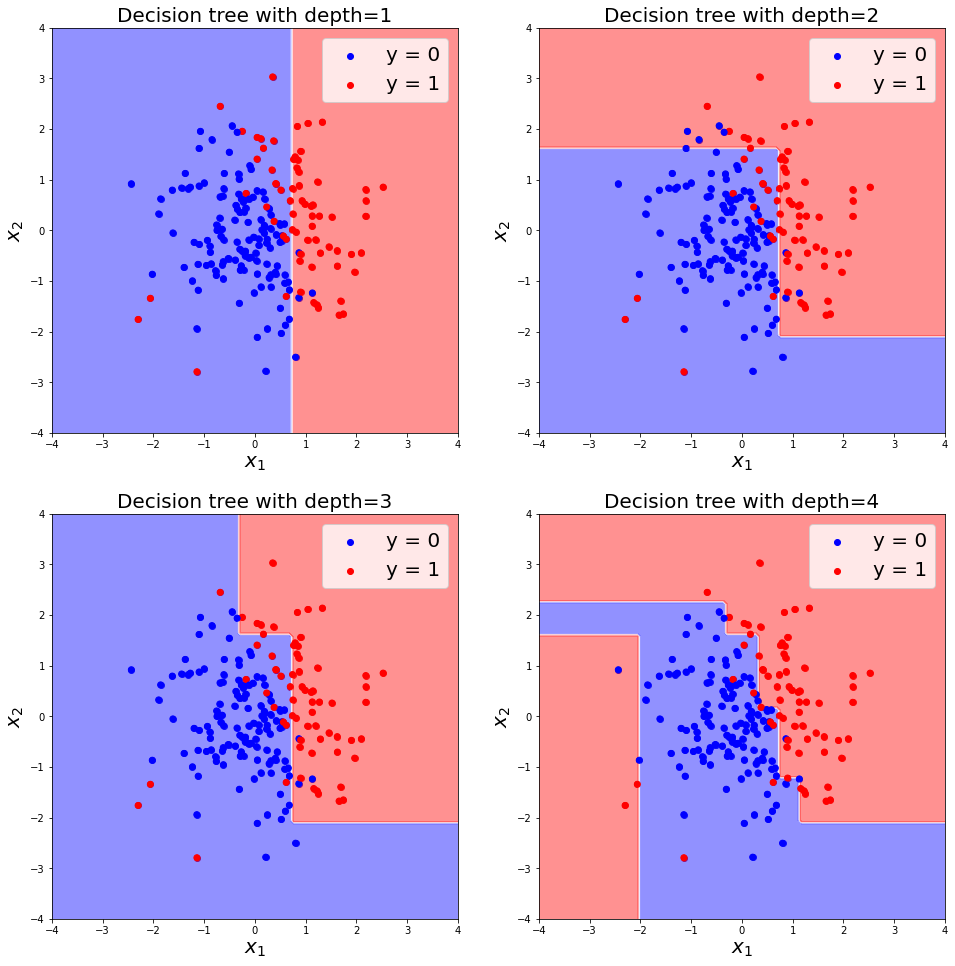

In [12]:
for i in range(4):
    # Build the trees (with depth=2)
    Classifier_tree_example_2 = DecisionTreeClassifier(max_depth=i+1)
    Classifier_tree_example_2.fit(x, y)
    y_tree_example_2 = Classifier_tree_example_2.predict(X).reshape(shape(X1))
    
    # Plot data
    subplot(2,2,i+1)
    scatter(x1[y==0], x2[y==0], c='b')
    scatter(x1[y==1], x2[y==1], c='r')
    contourf(X1, X2, y_tree_example_2, cmap='bwr', alpha=0.5)
    scatter(x1, x2, c=y, cmap='bwr')
    legend(['y = 0', 'y = 1'], prop={'size': 20})
    xlabel("$x_1$", fontsize=20)
    ylabel("$x_2$", fontsize=20)
    title('Decision tree with depth='+str(i+1), size=20)
subplots_adjust(top=1.5)

Text(0, 0.5, 'Log Loss')

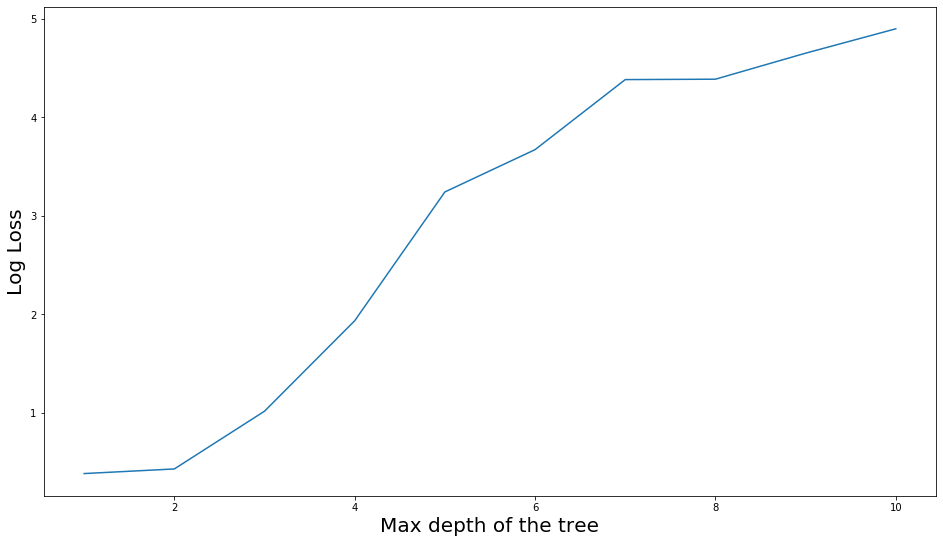

In [20]:
# Define the cvp (cross-validation procedure) with random 1000 samples, 2/3 training size, and 1/3 test size
cvp = ShuffleSplit(n_splits = 10, test_size = 1/3, train_size = 2/3, random_state = 1000)

# Define the max depths between 1 and 10
n_depths = 10
depths = linspace(1, 10, n_depths)

# Loop on the max_depth parameter and compute median RMSE
tab_LogLoss_tree = zeros(n_depths)
for i in range(n_depths):
    classifier_tree = DecisionTreeClassifier(max_depth=depths[i], random_state = 0)
    tab_LogLoss_tree[i] = median(-cross_val_score(classifier_tree, X, y, scoring='neg_log_loss', cv=cvp))

# Plot
plot(depths, tab_LogLoss_tree)
xlabel('Max depth of the tree', size=20)
ylabel('Log Loss', size=20)

In [21]:
best_max_depth = tab_LogLoss_tree.argmin()+1
best_max_depth 

1

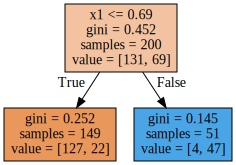

In [22]:
# 3. Plot the best classification tree

# Adjust regression tree with optimal depth
classifier_tree = DecisionTreeClassifier(max_depth=best_max_depth)
classifier_tree.fit(X, y)
y_tree = classifier_tree.predict(X)

# Export the tree to "plot_tree.pdf"
plot_tree = export_graphviz(classifier_tree, out_file=None, feature_names=['x1','x2'], filled=True) 
graph = Source(plot_tree) 
graph.render("classifier_tree")

# Plot the tree
graph

In [23]:
# 3. Implement and compare the classification forest with depth=3 and the ada boost classifier

# Adjust Classifier forest using 1000 trees
classifier_forest = RandomForestClassifier(n_estimators=1000, max_depth=3)
classifier_forest.fit(X, y)
y_forest = classifier_forest.predict(X)

#Adjust ada boost classifier
AdaBoost_classifier = AdaBoostClassifier(n_estimators=1000)
AdaBoost_classifier.fit(X, y)
y_adaBoost = AdaBoost_classifier.predict(X)

# Comparaison
log_loss_forest = log_loss(y, y_forest)
log_loss_adaBoost = log_loss(y, y_adaBoost)

print(log_loss_forest)
print(log_loss_adaBoost)

2.590416225592604
9.992007221626413e-16
